In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import check_random_state
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

C:\Users\wanyi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load data from EDA and cleaning


In [3]:
train = pd.read_csv('C:/Users/wanyi/Desktop/Data Mining/Final project/Stage 1/Jiahui data/without_outlier/train_no_outlier.csv')
test = pd.read_csv('C:/Users/wanyi/Desktop/Data Mining/Final project/Stage 1/Jiahui data/without_outlier/test_no_outlier.csv')
combined = pd.concat([train, test])

* We included Transactionrevenue for Marktering strategy and customer segmentation purposes. 
* However, for revenue prediction, we excluded Transactionrevenue as we would not have responses for testing data and future work.


# Applying Kmeans

In [5]:
key_features = ['avg_hits','avg_pageviews','visitNumber','bounces','subContinent_Northern America','channelGrouping_Referral','operatingSystem_Macintosh'] #this is from EDA and random forest feature importance
train_data = combined[key_features]
stscaler = StandardScaler().fit(train_data)
train_data_scaled = stscaler.transform(train_data)

In [ ]:
#Finding the number of cluster using the elbow rule 
ks = range(1,10) 
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(train_data_scaled)
    inertias.append(model.inertia_)

In [ ]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks()
plt.show()

In [6]:
#Interpretation of the inertia graph 
#Based on the graph, inertia started to slowly change less and less at N=5. As such, we take N=3 as the "Elbow" or optimal number of cluster
#Finding the clustering label 
model = KMeans(n_clusters = 5)
labels = model.fit_predict(train_data_scaled)
print(labels)


[3 3 0 ... 3 1 0]


In [7]:
print(len(labels))
set(labels)

704278


{0, 1, 2, 3, 4}

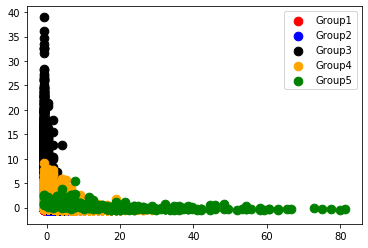

In [24]:
#Color the dataset based on the label and plot 
plt.scatter(train_data_scaled[labels == 0, 3], train_data_scaled[labels == 0, 0], s = 75, 
            c = 'red', label = 'Group1')
plt.scatter(train_data_scaled[labels == 1, 3], train_data_scaled[labels == 1, 0], s = 75, 
            c = 'blue', label = 'Group2')
plt.scatter(train_data_scaled[labels == 2, 3], train_data_scaled[labels == 2, 0], s = 75, 
            c = 'black', label = 'Group3')
plt.scatter(train_data_scaled[labels == 3, 3], train_data_scaled[labels == 3, 0], s = 75, 
            c = 'orange', label = 'Group4')
plt.scatter(train_data_scaled[labels == 4, 3], train_data_scaled[labels == 4, 0], s = 75, 
            c = 'green', label = 'Group5')
plt.legend()

#['avg_hits','avg_pageviews','visitNumber','bounces','subContinent_Northern America','channelGrouping_Referral','operatingSystem_Macintosh']

In [10]:
# Centroid for customer group clustering 
centroid = model.cluster_centers_ #['avg_hits','avg_pageviews','visitNumber','bounces','subContinent_Northern America','channelGrouping_Referral','operatingSystem_Macintosh']
centroid_table = pd.DataFrame(centroid, columns =['avg_hits','avg_pageviews','visitNumber','bounces','subContinent_Northern America','channelGrouping_Referral','operatingSystem_Macintosh'])
centroid_table

,avg_hits,avg_pageviews,visitNumber,bounces,subContinent_Northern America,channelGrouping_Referral,operatingSystem_Macintosh
0,-0.393914,-0.429495,-0.066854,0.555878,-0.171351,-0.140866,-0.103712
1,0.704485,0.724890,3.938903,1.567305,3.692653,3.842120,3.478003
2,3.842375,3.850792,0.090537,-0.701218,0.358434,0.244960,0.128910
3,0.142166,0.186890,-0.104052,-0.741786,0.022551,-0.003199,-0.030019
4,0.325433,0.318801,27.988826,20.000015,22.977916,12.718354,16.174593


# PCA features with labels attached above - Just for visualization - No redo Kmeans again

In [12]:
from sklearn.decomposition import PCA 
pca_model = PCA() 
pca_model.fit(train_data_scaled)
pca_transformed = pca_model.transform(train_data_scaled)
print(pca_model.explained_variance_ratio_)
pca_train_data = pd.DataFrame(pca_transformed).iloc[:,0:3] #first three pca 
pca_train_data.head()

[0.3993488  0.300718   0.12635367 0.08387386 0.06646024 0.02070365
 0.00254178]


,0,1,2
0,-0.788337,-0.297480,-0.293008
1,0.154178,-0.050641,-1.228471
2,-0.628526,0.640844,0.255396
3,-0.422694,-0.123612,-0.279979
4,-0.221903,0.694420,0.308281


In [14]:
stscaler = StandardScaler().fit(pca_train_data)
train_data_scaled_pca = stscaler.transform(pca_train_data)

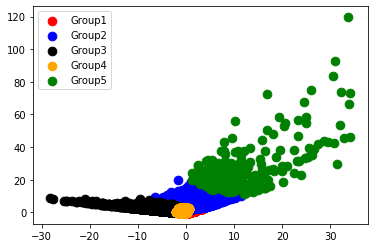

In [15]:
#Color the dataset based on the label and plot 
plt.scatter(train_data_scaled_pca[labels == 0, 1], train_data_scaled_pca[labels == 0, 0], s = 75, 
            c = 'red', label = 'Group1')
plt.scatter(train_data_scaled_pca[labels == 1, 1], train_data_scaled_pca[labels == 1, 0], s = 75, 
            c = 'blue', label = 'Group2')
plt.scatter(train_data_scaled_pca[labels == 2, 1], train_data_scaled_pca[labels == 2, 0], s = 75, 
            c = 'black', label = 'Group3')
plt.scatter(train_data_scaled_pca[labels == 3, 1], train_data_scaled_pca[labels == 3, 0], s = 75, 
            c = 'orange', label = 'Group4')
plt.scatter(train_data_scaled_pca[labels == 4, 1], train_data_scaled_pca[labels == 4, 0], s = 75, 
            c = 'green', label = 'Group5')

plt.legend()

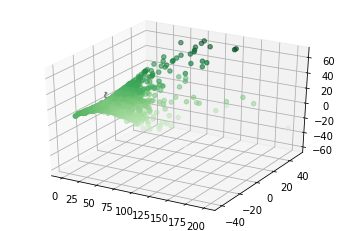

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
xdata = pca_train_data.iloc[:,0]
ydata = pca_train_data.iloc[:,1]
zdata = pca_train_data.iloc[:,2]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [21]:
group0 = pca_train_data[labels ==0].index.tolist()
group1 = pca_train_data[labels ==1].index.tolist()
group2 = pca_train_data[labels ==2].index.tolist()
group3 = pca_train_data[labels ==3].index.tolist()
group4 = pca_train_data[labels ==4].index.tolist()

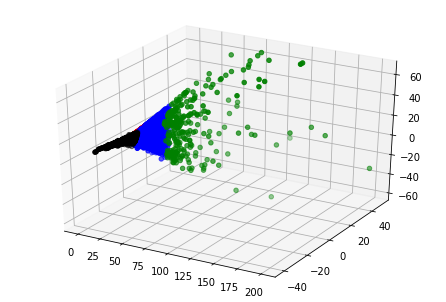

In [22]:
from mpl_toolkits import mplot3d
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(pca_train_data.iloc[group0,0],pca_train_data.iloc[group0,1],pca_train_data.iloc[group0,2],color='red')
ax.scatter(pca_train_data.iloc[group1,0],pca_train_data.iloc[group1,1],pca_train_data.iloc[group1,2],color='blue')
ax.scatter(pca_train_data.iloc[group2,0],pca_train_data.iloc[group2,1],pca_train_data.iloc[group2,2],color='black')
ax.scatter(pca_train_data.iloc[group3,0],pca_train_data.iloc[group3,1],pca_train_data.iloc[group3,2],color='orange')
ax.scatter(pca_train_data.iloc[group4,0],pca_train_data.iloc[group4,1],pca_train_data.iloc[group4,2],color='green')
plt.show()

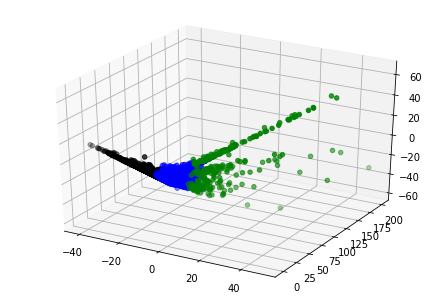

In [23]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(pca_train_data.iloc[group0,1],pca_train_data.iloc[group0,0],pca_train_data.iloc[group0,2],color='red')
ax.scatter(pca_train_data.iloc[group1,1],pca_train_data.iloc[group1,0],pca_train_data.iloc[group1,2],color='blue')
ax.scatter(pca_train_data.iloc[group2,1],pca_train_data.iloc[group2,0],pca_train_data.iloc[group2,2],color='black')
ax.scatter(pca_train_data.iloc[group3,1],pca_train_data.iloc[group3,0],pca_train_data.iloc[group3,2],color='orange')
ax.scatter(pca_train_data.iloc[group4,1],pca_train_data.iloc[group4,0],pca_train_data.iloc[group4,2],color='green')
plt.show()

# Conclusion from above (centroid and visualization)
* Five color clusters = Red,Blue,Black,Green,Orange
* Five lables = 0,1,2,3,4
* Based on the centroids, we noted that cluster 0 and 1 are similar as such for modeling purpose we group those group into one cluster for prediction. 

# Export Data


In [27]:
print(combined[labels == 0].shape[0]) #red
print(combined[labels == 1].shape[0]) #blue
print(combined[labels == 2].shape[0]) #black
print(combined[labels == 3].shape[0]) #orange
print(combined[labels == 4].shape[0]) #green


376912
11507
25776
289808
275


In [26]:
Cluster0 = combined[labels == 0]
Cluster1 = combined[labels == 1]
Cluster2 = combined[labels == 2]
Cluster3 = combined[labels == 3]
Cluster4 = combined[labels == 4]

In [ ]:
Cluster0.to_csv('Cluster0.csv')
Cluster1.to_csv('Cluster1.csv')
Cluster2.to_csv('Cluster2.csv')
Cluster3.to_csv('Cluster3.csv')
Cluster4.to_csv('Cluster4.csv')

# Below we have also tried another three different clustering method including:

* DBSCAN - result had way to much cluster - curse of dimensionality.
* TSNE  - result had one giant cloud - no clear cluster - dimension reduced and no proper interpretations. 
* Hierarchical - Works for small dataset and result if not as good as Kmeans. 

# However, Kmeans turned out to be the best result for clustering.

# applying DBSCAN 

In [ ]:
#Determine epsilon 
from sklearn.neighbors import NearestNeighbors
import math

nbrs = NearestNeighbors(n_neighbors = round(math.log(len(train_data_scaled)))).fit(train_data_scaled)
distances, indices = nbrs.kneighbors(train_data_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = 4 , min_samples = np.log(train_data_scaled.shape[0])).fit(train_data_scaled)
#For number of min_samples, I used ln(n), where n is the total number of points to be clustered per Utku's Canvas annoucement 
# For eps, I used 0.3 based on estimation in the following code block below. 
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

unique_labels = np.unique(labels)
print(unique_labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = train_data_scaled[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = train_data_scaled[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 10)


In [ ]:
key_features = ['TransactionRevenue','avg_hits','avg_pageviews','visitNumber','bounces','subContinent_Northern America','channelGrouping_Referral','operatingSystem_Macintosh']
train_data = train[key_features]
train_data.head()

In [ ]:
plt.title("DBSCAN on train_data_scaled")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(unique_labels)

# applying Hierarchical 

In [20]:
key_features = ['avg_hits','avg_pageviews','visitNumber','bounces','subContinent_Northern America','channelGrouping_Referral','operatingSystem_Macintosh']
train_data = combined[key_features]

In [33]:
split_data = train_data.iloc[1:10000,]
split_data

,avg_hits,avg_pageviews,visitNumber,bounces,subContinent_Northern America,channelGrouping_Referral,operatingSystem_Macintosh
1,2.000000,2.0,1,0,1,1,0
2,1.000000,1.0,1,1,0,0,0
3,3.000000,2.0,1,0,1,0,0
4,1.000000,1.0,1,1,1,0,0
5,2.000000,2.0,1,0,1,0,1
...,...,...,...,...,...,...,...
9995,4.000000,4.0,1,0,1,0,0
9996,1.000000,1.0,1,1,0,0,0
9997,3.833333,3.5,6,4,6,0,0
9998,1.000000,1.0,1,1,0,0,0


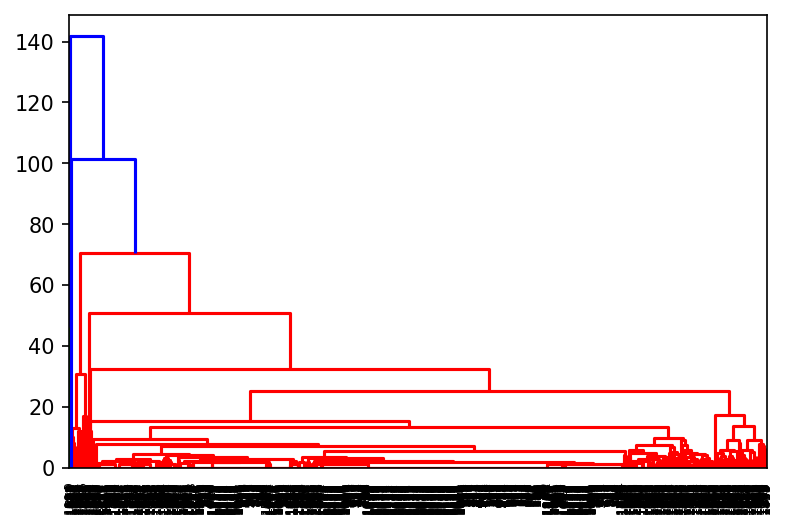

In [32]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

plt.rcParams['figure.dpi'] = 150

customer = split_data.index.values
customer_type = list(customer)
mergings = linkage(split_data, method='complete')

dendrogram(mergings,
           labels= customer_type,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

# t-SNE

In [ ]:
import matplotlib.pyplot as plt
import math
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100, perplexity=math.sqrt(train_data.shape[1]) )
Tsne_transformed = model.fit_transform(train_data)


In [ ]:
xs = Tsne_transformed[:,0]
ys = Tsne_transformed[:,1]
plt.scatter(xs,ys, alpha=0.5)
for x, y, customer in zip(xs, ys, customer_id):
    plt.annotate(customer, (x, y), fontsize=10, alpha=0.75)
plt.show()
plt.figure(figsize = (60,60))

In [ ]:
y = df2.TransactionRevenue
x = df2.visitNumber
plt.scatter(x, y)

In [ ]:
df_revenue_pageview_hit = df2.iloc[:,1:4]

corr = df_revenue_pageview_hit.corr(method ='pearson') 
import matplotlib.pyplot as plt
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

# Modeling Section


In [32]:
import pandas as pd
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from bayes_opt import BayesianOptimization
import warnings
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro

In [ ]:
cluster0=pd.read_csv('Cluster0.csv')
cluster1=pd.read_csv('Cluster1.csv')
cluster1=pd.concat([cluster0,cluster1])
cluster2=pd.read_csv('Cluster2.csv')
cluster3=pd.read_csv('Cluster3.csv')
cluster4=pd.read_csv('Cluster4.csv')
cluster1=cluster1.drop(columns=['fullVisitorId'])
cluster2=cluster2.drop(columns=['fullVisitorId'])
cluster3=cluster3.drop(columns=['fullVisitorId'])
cluster4=cluster4.drop(columns=['fullVisitorId'])
y1=cluster1.iloc[:,1]
x1=cluster1.iloc[:,2:]
y2=cluster2.iloc[:,2]
x2=cluster2.iloc[:,2:]
y3=cluster3.iloc[:,1]
x3=cluster3.iloc[:,2:]
y4=cluster4.iloc[:,1]
x4=cluster4.iloc[:,2:]


# Modeling for cluster 1 ---- Similar to rest of 3 

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from bayes_opt import BayesianOptimization
import warnings
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro

In [ ]:
# Spliting test and train for cross-validation 
xtrain, X_test, ytrain, y_test = train_test_split(
x1, y1, test_size=0.5, random_state=42)
clf=RandomForestRegressor()
clf.fit(xtrain, ytrain)
importantscores=dict(zip(xtrain.columns,clf.feature_importances_))
x = importantscores
import matplotlib.pyplot as plt
plot={k: v for k, v in sorted(x.items(), key=lambda item: item[1])[::-1]}
plt.rcParams["figure.figsize"] = (30,5)
feature=list(plot.keys())[:3]
importance=list(plot.values())[:3]
col=[]
for i in X_test.columns:
    if i in feature:
        col.append(i)
X_test=X_test.loc[:,col]

* Using Random Forest to find feature importance 

In [ ]:
xtrain, X_test, ytrain, y_test = train_test_split(
x, y, test_size=0.5, random_state=42)
clf=RandomForestRegressor()
clf.fit(xtrain, ytrain)
importantscores=dict(zip(xtrain.columns,clf.feature_importances_))
x = importantscores
import matplotlib.pyplot as plt
plot={k: v for k, v in sorted(x.items(), key=lambda item: item[1])[::-1]}
plt.rcParams["figure.figsize"] = (30,5)
feature=list(plot.keys())[:6]
importance=list(plot.values())[:6]
col=[]
for i in X_test.columns:
    if i in feature:
        col.append(i)
X_test=X_test.loc[:,col]

In [ ]:
# Plot the feature importance graph 
import seaborn as sns
sns.set(font_scale=2) 
plt.rcParams["figure.figsize"] = (30,10)
sns.barplot(y=list(plot.keys())[:10],x=list(plot.values())[:10],palette="Blues_d").set_title("Feature Importance")

In [ ]:
col=[]
for i in X_test.columns:
    if i in feature:
        col.append(i)
X_test=X_test.loc[:,col]

* using BayesianOptimization to find the optimal parameters for all models 
* This is similar to use RandomizedSearchCV or gridsearch 

In [ ]:
def train_model(max_depth, 
                ntrees,
                min_rows,
                learning_rate,
                max_features
                ):
    params = {
        'max_depth': int(max_depth),
        'ntrees': int(ntrees),
        'learning_rate':int(learning_rate),
        'min_rows': int(min_rows),
        "max_features":int(max_features)
    }
    clf=GradientBoostingRegressor()
    #different models used are listed below 
    #clf=RandomForestRegressor() 
    #clf=linear_model.Lasso()
    #clf=Ridge()
    #clf=XGBRegressor()
    return -sum(cross_val_score(clf,X_test,y_test, cv=5,scoring='neg_mean_squared_error'))/5
bounds = {
    'max_depth':(5,20),
    'ntrees': (100,1000),
    'learning_rate':(0.0001,0.9),
    'min_rows':(10,30),
    'max_features':(2,90)
}
Boptimizer = BayesianOptimization(
    f=train_model,
    pbounds=bounds,
    random_state=1
)
GBRoptimizer.maximize(init_points=10, n_iter=4)
GBRoptimizer.max


* We can compare the RMSE for each 1) Test_set 2) Train_set 3) CV - Three should be very similar to each other. 
* Please note that here test_set is only the test that is splited out from the original train dataset. As such, we do have the responses values.
* See below as demo for comparison. If three RMSE do not match, we should keep updating paramters to find the optimal 
* As such this is a long process of identify the optimal parameters. 
* 1) GridSearch 2) BaysianOptimization 3) RandomizedSearch CV are more efficient. 


In [ ]:
# Test_Set RMSE 
gb.fit(x_train, y_train)
y_pred_Gboost = gb.predict(x_test)
from sklearn.metrics import mean_squared_error as MSE
mse_test_Gboost = MSE(y_test, y_pred_Gboost)
rmse_test_Gboost = mse_test_Gboost**(1/2)
print('Test set RMSE of gb: {:.15f}'.format(rmse_test_Gboost))

In [ ]:
# Train_Set RMSE 
gb.fit(x_train, y_train)
y_train_pred = gb.predict(x_train)
mse_train_Gboost = MSE(y_train, y_train_pred)
rmse_train_Gboost = mse_train_Gboost**(1/2)
print('Train set RMSE of gb: {:.15f}'.format(rmse_train_Gboost))

In [ ]:
# CV RMSE
from sklearn.model_selection import cross_val_score
MSE_CV_scores_gb = - cross_val_score(gb, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', n_jobs=-1) 
RMSE_CV_gb = (MSE_CV_scores_gb.mean())**(1/2)
print('CV RMSE gb: {:.2f}'.format(RMSE_CV_gb)) 

# Modeling Conclusion:
* Based on the best target rate from above, we determine that GradientBoosting had the best result with the lowest RMSE

# Other considerations:

* 1) Imbalancing data 
    - Manual random select to balance 
    - SMOTE
* 2) Prediction by session level (everything above is by customer level) - Exact the same process as above - see another notebook

# Balancing the imbalance data - Manually

In [ ]:
revenue_df=copy.deepcopy(df_train)
revenue_df['has_revenue']=0
revenue_df.loc[revenue_df['log_revenue']>0,'has_revenue']=1

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot('has_revenue', data=revenue_df)
plt.title('Imbalanced Classes')
plt.show()

* Manually make the imbalance data balance

In [ ]:
# Shuffle the Dataset.
shuffled_df = df_train.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
revenue_df = shuffled_df.loc[shuffled_df['log_revenue']>0]

#Randomly select 492 observations from the non-fraud (majority class)
non_revenue_df = shuffled_df.loc[shuffled_df['log_revenue'] == 0].sample(n=len(revenu_df[revenue_df.has_revenue ==1]),random_state=42)

# Concatenate both dataframes again
balanced_df = pd.concat([revenue_df, non_revenue_df])
balanced_df['has_revenue']=0
balanced_df.loc[balanced_df['log_revenue']>0,'has_revenue']=1

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('has_revenue', data=balanced_df)
plt.title('Balanced Classes')
plt.show()

# Once you have the artificial dataset, you run the model again. 

# Balancing the imbalance data - SMOTE

In [ ]:
df1 = df_total.drop("fullVisitorId", axis=1)
dfx1 = df1.drop("trans_label", axis=1)
dfy1 = pd.DataFrame({"trans_label" : df1["trans_label"]})
print(dfx1.shape, dfy1.shape)
dfy1["trans_label"].value_counts()

In [ ]:
# Resample the dataset
smote = SMOTE(sampling_strategy=0.125)
dfx1_resampled, dfy1_resampled = smote.fit_resample(dfx1, dfy1)
print(dfx1_resampled.shape, dfy1_resampled.shape)

In [ ]:
dfy1_resampled["trans_label"].value_counts()